# Lab 4: Optimisation

The purpose of this lab session is to study in more depth optimisation notions and use them to model and solve optimisation programs. Recall that in the last lecture we discussed the different formats of *linear programs* and how to switch from one formutation to another. 

## 1. Verifying the model design (by revisiting tasks from lab 3)

In the previous lab session, we discussed two examples where you were asked to model them with linear programs and solve them using python libraries.

We begin by revisiting these two examples and checking their solution. Please check *lab3-files* and in particular the *How to build a model* file.  

**Example 1 (Task 5 in Lab 3):** Click Details to recall the example.

<details>
A company will face the following cash requirements in the next eight quarters (positive entries
represent cash needs while negative entries represent cash surpluses). 

| Q1 | Q2 | Q3 | Q4 | Q5 | Q6 | Q7 | Q8 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 100 | 500 | 100 | -600 | -500 | 200 | 600 | -900 |

The company has three borrowing possibilities.
<ul>
<li> a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
<li> The other two borrowing opportunities are available at the beginning of every quarter: a 6-
month loan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the
quarter.
</ul>
    
Any surplus can be invested at a 0.5% interest per quarter. Formulate a linear program that maximises
the wealth of the company at the beginning of Q9. Solve the problem using **linprog** and interpret the
solution.
</details>

**Task 1**: Please see below for the solution and check file *How to build the model* in the *lab3-files* folder. See if the model and the implementation makes sense to you.

In [1]:
import numpy as np
from scipy.optimize import linprog

# I generate the vector of coefficients in the objective function and initialize the matrix of contraint coefficients
c = np.concatenate([np.zeros(21), [-1]]) # Recall that linprog has a minimization objective, so we minimize -wealth
A = np.zeros((8,22))

# I create a row for each constraint
A[0] = np.concatenate([[1,1,1,-1],np.zeros(18)])
A[1] = np.concatenate([[-0.01, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(15)])
A[2] = np.concatenate([[-0.01, -1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(12)])
A[3] = np.concatenate([[-0.01, 0, 0, 0, -1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(9)])
A[4] = np.concatenate([[-0.01], np.zeros(6), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(6)])
A[5] = np.concatenate([[-0.01], np.zeros(9), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(3)])
A[6] = np.concatenate([[-0.01], np.zeros(12), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, -1, 0]])
A[7] = np.concatenate([[-1.01], np.zeros(15), [-1.018, 0, 0, -1.025, 1.005, -1]])

b = [100, 500, 100, -600, -500, 200, 600, -900]

# It is now time to solve. All variables are constrained to be non-negative, so I don't need to specify the bounds; this is the default
res = linprog(c, A_eq=A, b_eq=b, method='revised simplex', options={"disp": True})

# Print the solution. Recall that the wealth is the last variable. 
res.x

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  1131.370849898      -900.0              
1     1         NA                  1084.622736254      -900.0              
1     2         NA                  879.4789725306      -900.0              
1     3         NA                  792.3938429683      -900.0              
1     4         NA                  727.2892907422      -900.0              
1     5         NA                  621.5481973748      -900.0              
1     6         NA                  434.3424603237      -900.0              
1     7         NA                  330.5410934859      -799.0              
1     8         NA                  299.9109874116      -768.5675148382     
1     9         NA                  1.803155319699e-13  -461.1587527412     
2     9         NA                  1.803155319699e-13  -461.1587527412     
2     10        NA                  1.392373714443e-13  -468.7828125949     


/var/folders/t_/4t8_qnxj42v8gqmhh22r_hs80000gn/T/ipykernel_96103/1607219463.py:21: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_eq=A, b_eq=b, method='revised simplex', options={"disp": True})


array([424.40992891,   0.        ,   0.        , 324.40992891,
       178.21212073,   0.        ,   0.        ,   0.        ,
       107.45191746,   0.        ,   0.        ,   0.        ,
       304.19774641,   0.        ,   0.        , 801.47463585,
         0.        ,   0.        , 601.23790974,   0.        ,
         0.        , 471.3459718 ])

**Example 2 (Task 6 in Lab 3):**  Click Details to recall the example.

<details>
Consider a restaurant that is open seven days a week. Based on past experience, the number of workers needed on a particular day is given as follows: 

| Mon | Tue | Wed | Thu | Fri | Sat | Sun | 
| --- | --- | --- | --- | --- | --- | --- |
| 14 | 13 | 15 | 16 | 19 | 18 | 11 |

Every worker works five days in a week and has two days off in the following pattern: three days work, one day off, two days work, one day off. So, there are workers working on Mon-Tue-Wed-Fri-Sat, other workers on Tue-Wed-Thu-Sat-Sun, etc. How can we minimize the number of workers that staff the restaurant? 
</details>

**Task 2**: Please see below for the solution and check file How to build the model in the lab3-files folder. See if the model and the implementation makes sense to you.

In [4]:
import numpy as np
from scipy.optimize import linprog

# I generate the vector of coefficients in the objective function 
c = np.array([1,1,1,1,1,1,1])
A = np.zeros((7,7))

# I create a row for each constraint
A[0] = np.array([-1,0,-1,-1,-1,0,-1])
A[1] = np.array([-1,-1,0,-1,-1,-1,0])
A[2] = np.array([0,-1,-1,0,-1,-1,-1])
A[3] = np.array([-1,0,-1,-1,0,-1,-1])
A[4] = np.array([-1,-1,0,-1,-1,0,-1])
A[5] = np.array([-1,-1,-1,0,-1,-1,0])
A[6] = np.array([0,-1,-1,-1,0,-1,-1])
b = np.array([-14, -13, -15, -16, -19, -18, -11])

# It is now time to solve. All variables are constrained to be non-negative, so I don't need to specify the bounds; this is the default
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex', options={"disp": True})

# Print the solution. Recall that the wealth is the last variable. 
res.x

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         -19.0               0.0                 0.0                 
1     1         -15.0               0.0                 13.0                
1     2         -14.0               0.0                 14.0                
1     3         -6.0                0.0                 18.0                
1     4         -6.0                0.0                 18.66666666667      
1     5         -5.0                0.0                 19.0                
1     6         -4.0                0.0                 20.0                
1     7         -2.0                0.0                 22.0                
1     8         0.0                 0.0                 22.66666666667      
2     8         0.0                 0.0                 22.66666666667      
Optimization terminated successfully.
         Current function value: 22.666667   
         Iterations: 8


/var/folders/t_/4t8_qnxj42v8gqmhh22r_hs80000gn/T/ipykernel_96103/3311439236.py:19: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='revised simplex', options={"disp": True})


array([7.66666667, 2.66666667, 3.66666667, 0.        , 4.        ,
       0.        , 4.66666667])

It is clear from the solution that our model did **not** take into account the fact that the number of workers must be an *integer* number. Hence, in last week's lab  we discussed integer linear programming (see Section 5 in Lab 3).

## 2. Testing our understanding on different LP formats

In the lecture of Week 18 (available also at [Listen Again](https://listenagain.essex.ac.uk/) we navigated throught different LP formats. The following couple of tasks involve transforming a linear program from one form to another.

In the following, we use the convention that the **standard form** is when the objective function is a **minimization** function, all constraints are **equalities** and all variables must be **non-negative**.

**Task 3:** Write the following linear program in *standard form*.

\begin{eqnarray*}
\min & \hspace{1cm}& x_2 \\
\text{subject to} & \hspace{1cm}&x_1+x_2 \geq 1\\
& \hspace{1cm}&x_1-x_2 \leq 0
\end{eqnarray*}
Note that $x_1, x_2$ are unrestricted in sign.


**Solution to Task 3:** Click on *Details* below to reveal it.

<details>

Let us write $x_i = y_i-z_i$ for $i=1, 2$ with $y_i\geq 0$, $z_i\geq 0$ and let us introduce slack variable $s_1$ for the first constraint and $s_2$ for the second constraint. We obtain
    \begin{eqnarray*}
\min & \hspace{1cm}& y_2-z_2 \\
\text{subject to} & \hspace{1cm}&y_1-z_1+y_2-z_2-s_1 = 1\\ %Is it clear why $s_1$ appears with a negative sign?
& \hspace{1cm}&y_1-z_1-y_2+z_2+s_2 = 0\\
    & \hspace{1cm}&y_1,z_1,y_2,z_2,s_1,s_2\geq 0
\end{eqnarray*}
</details>

**Task 4:** Write the following linear program in *standard form*.

\begin{eqnarray*}
\min & \hspace{1cm}& 4x_1+x_2-x_3 \\
\text{subject to} & \hspace{1cm}&x_1+3x_3 \leq 6\\
& \hspace{1cm}&3x_1+x_2+3x_3\geq 9\\
& \hspace{1cm}&x_1,x_2\geq 0
\end{eqnarray*}
Note that $x_3$ is unrestricted in sign.

**Solution to Task 4:** Click on *Details* below to reveal it.

<details>

Let us write $x_3 = y_3-z_3$ with $y_3\geq 0$, $z_3\geq 0$ and let us introduce slack variable $s_1$ for the first constraint and $s_2$ for the second constraint. We obtain
    \begin{eqnarray*}
\min & \hspace{1cm}& 4x_1+x_2-y_3+z_3\\
\text{subject to} & \hspace{1cm}&x_1+3y_3-3z_3+s_1 = 6\\ 
& \hspace{1cm}&3x_1+x_2+3y_3-3z_3-s_2 = 9\\ %Is it clear why $s_2$ appears with a negative sign?
    & \hspace{1cm}&x_1, x_2, y_3,z_3,s_1,s_2\geq 0
\end{eqnarray*}
</details>

## 3. Using different solvers

### 3a. Excel SOLVER
We now work with a solver outside Python, namely the solver embedded in the well-known Excel application. Please check the folder *lab4-files* in the CF969 moodle page.

**Task 5:** Please open the file *How to add Solver to Excel.pdf* and work through the instructions to get the Excel SOLVER add-in to work. Using the instructions, run Excel’s SOLVER on the example linear program (LP) described in the file *LP with Excel (model building).pdf*, to which *How to add Solver to Excel.pdf* also refers.

**Task 6:** Solve Example 2 (Task 6 in Lab 3) using Excel SOLVER. Recall that we now need to impose the constraint for an integral solution.

**Solution to Task 6**: Check file *task6-sol.xlsx*.

### 3b. Gurobi and Gurobipy

Gurobi is a powerful optimisation software. It is installed in the lab computers and we covered an example in the most recent lecture on how to use it. In case you wish to check it now, please visit slides 71 to 81 in file *CF969 - 3 - Mathematical Optimisation.pptx* in the CF969 moodle page.

Apart from using Gurobi on its own, we have the option to invoke Gurobi through Python, by using the *gurobipy* package.

#### Installing Gurobipy

To install gurobipy, please see https://support.gurobi.com/hc/en-us/articles/360044290292-How-do-I-install-Gurobi-for-Python-

If your are using Horizon (https://csee-horizon.essex.ac.uk/portal/webclient/index.html), please open a command prompt and execute (while still in drive m:\) "m:\python -m pip install gurobipy" (without the quotes)


##### Solving an Integer Linear Program with Gurobipy

The following example shows how to use gurobipy to solve an integer linear program. Recall that in integer linear programs, each variable must be given an integer value. Such constraints arise quite naturally in many different settings.


#### Task Assignment Problem formulation

Consider three tasks that need to be completed: let's call them A, B, and C. 

Consider three users that, in principle, can do the tasks: 1, 2, and 3.

#### Data 

The ability to perform each task is as follows: User 1 can execute task A with quality 0.53, task B with quality 0.27 and task C with quality 0.13. Similarly, user 2 has 0.8 for task A, 0.47 for task B, and 0.67 for task C, and finally, user 3 has 0.53 for task A, 0.73 for task B, and 0.47 for task C.

**Assumption**: Only one user can be assigned to a task, and each user must execute at most one task.

#### Problem statement

Determine an assignment that ensures that each task is executed and each user executes at most one tasks in order to maximize the total quality of the tasks executed according to the assignment.

#### Decision variables

The decision variable $x_{r,\; j} = 1$ represents that user r is assigned to task j, and 0 otherwise, for  r=1,2,3 and 𝑗=1,2,3.

#### Constraints

#### Jobs constraints

For each task 𝑗=A,B,C, exactly one user from r=1,2,3 must be assigned.

Constraint (A=1): $x_{1,\; A} + x_{2,\; 1} + x_{3,\; 1} = 1$

Constraint (B=2): $x_{1,\; 2} + x_{2,\; 2} + x_{3,\; 2} = 1$

Constraint (C=3): $x_{1,\; 3} + x_{2,\; 3} + x_{3,\; 3} = 1$

#### Resources constraints

For each user r=1,2,3, at most one task from j=A,B,C can be assigned.

Constraint (user 1): $x_{1,\; 1} + x_{1,\; 2} + x_{1,\; 3}  \leq 1$

Constraint (user 2): $x_{2,\; 1} + x_{2,\; 2} + x_{2,\; 3}  \leq 1$

Constraint (user 3): $x_{2,\; 1} + x_{2,\; 2} + x_{2,\; 3}  \leq 1$

#### Objective function

The objective function is to maximize the total quality of the assignments while satisfying the user and task constraints.

$$
\max \; (53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1}) + (27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2})
+ (13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3})
$$




In [15]:
#!pip install gurobipy --user
# import gurobi library
from gurobipy import *

## Data
The list R contains the id's of the three users: 1, 2, and 3. 

The list J contains the names of the tasks: A, B, and C.

In [16]:
# resources and jobs sets
R = ['1', '2', '3']
J = ['A', 'B', 'C']

$r \in R$ index and set of users.

$j \in J$ index and set of tasks.

The following “multidict” function describes the quality score associated with each possible combination of a user and a task

In [17]:
# matching score data
combinations, ms = multidict({
    ('1', 'A'): 53,
    ('1', 'B'): 27,
    ('1', 'C'): 13,
    ('2', 'A'): 80,
    ('2', 'B'): 47,
    ('2', 'C'): 67,
    ('3', 'A'): 53,
    ('3', 'B'): 73,
    ('3', 'C'): 47
})

The following function generates an empty model object “m” and takes the string “RAP” model name as its argument.

In [18]:
# Declare and initialize model
m = Model('RAP')

## Decision variables

The decision variable $x_{r,\; j} = 1$ represents that user r is assigned to task j, and 0 otherwise, for $r \in R$ and $j \in J $.

The “addVars()” method defines the decision variables of the model object “m”.  

In [19]:
# Create decision variables for the RAP model
x = m.addVars(combinations, vtype=GRB.INTEGER, name="assign")

## Task constraints

For each task 𝑗= A,B,C, exactly one user from r=1,2,3 must be assigned.

Constraint (A=1): $x_{1,\; 1} + x_{2,\; 1} + x_{3,\; 1} = 1$

Constraint (B=2): $x_{1,\; 2} + x_{2,\; 2} + x_{3,\; 2} = 1$

Constraint (C=3): $x_{1,\; 3} + x_{2,\; 3} + x_{3,\; 3} = 1$

The “addConstrs()” method defines the constraints of the model object “m”. 


In [6]:
# create tasks  constraints
job = m.addConstrs((x.sum('*',j) == 1 for j in J), 'task')

## User constraints

For each user r=1,2,3, at most one task from r=1,2,3 can be assigned.

Constraint (1): $x_{1,\; 1} + x_{1,\; 2} + x_{1,\; 3}  \leq 1$

Constraint (2): $x_{2,\; 1} + x_{2,\; 2} + x_{2,\; 3}  \leq 1$

Constraint (3): $x_{3,\; 1} + x_{3,\; 2} + x_{3,\; 3}  \leq 1$

The “addConstrs()” method defines the constraints of the model object “m”. 

In [7]:
# create resources constraints
resource = m.addConstrs((x.sum(r,'*') <= 1 for r in R), 'user')

## Objective Function

The objective function is to maximize the total quality score of the assignments.

$$
Max \; (53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1}) + (27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2})
+ (13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3})
$$

The “setObjective()” method defines the objective function of the model object “m”. 

In [8]:
# The objective is to maximize total matching score of the assignments
m.setObjective(x.prod(ms), GRB.MAXIMIZE)

## Objective function
Notice that 
$$
(53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1}) = \sum_{r \; \in \; R} ms_{r,1}x_{r,1} \\
(27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2}) = \sum_{r \; \in \; R} ms_{r,2}x_{r,2} \\
(13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3})  = \sum_{r \; \in \; R} ms_{r,3}x_{r,3}
$$

Hence, the objective function can be expressed as follows

$$
Max \; \sum_{j \; \in \; J} \sum_{r \; \in \; R} ms_{r,j}x_{r,j}
$$

In [9]:
# save model for inspection
m.write('RAP.lp')

In [10]:
# run optimization engine
m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 9 columns and 18 nonzeros
Model fingerprint: 0x6de72f01
Variable types: 0 continuous, 9 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 6 rows, 9 columns, 18 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)
Found heuristic solution: objective 193.0000000

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 193 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.930000000000e+02, best bound 1.930000000000e+02, gap 0.0000%


In [11]:
def print_solution(model):
    for var in model.getVars():
        if abs(var.x) > 1e-6:
            print("{0}: {1}".format(var.varName, var.x))
    print('Total quality score: {0}'.format(model.objVal))
    return None

# display optimal values of decision variables
print_solution(m)   


assign[1,A]: 1.0
assign[2,C]: 1.0
assign[3,B]: 1.0
Total quality score: 193.0


**Task 7:** Solve Example 1 using gurobipy

**Solution to Task 7:** See the next snippet. Uncomment the line and run it.

In [13]:
# %load ./sol7.py
import numpy as np
from gurobipy import *
from gurobipy import GRB

# Declare and initialize model
m = Model('Task 7')

# Add variables
x = m.addMVar(shape=22, vtype=GRB.CONTINUOUS, name="x")

# Create matrix A
A = np.zeros((8,22))

# I create a row for each constraint
A[0] = np.concatenate([[1,1,1,-1],np.zeros(18)])
A[1] = np.concatenate([[-0.01, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(15)])
A[2] = np.concatenate([[-0.01, -1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(12)])
A[3] = np.concatenate([[-0.01, 0, 0, 0, -1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(9)])
A[4] = np.concatenate([[-0.01], np.zeros(6), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(6)])
A[5] = np.concatenate([[-0.01], np.zeros(9), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(3)])
A[6] = np.concatenate([[-0.01], np.zeros(12), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, -1, 0]])
A[7] = np.concatenate([[-1.01], np.zeros(15), [-1.018, 0, 0, -1.025, 1.005, -1]])

# The right-hand-side constants
rhs = np.array([100, 500, 100, -600, -500, 200, 600, -900])

# Adding the constraints
m.addConstr(A @ x == rhs, name="c")

# Setting the objective function. Here, I can be flexible and define a maximization problem, unlike in linprog
obj = np.concatenate([[0]*21,[1]])
m.setObjective(obj @ x, GRB.MAXIMIZE)

m.optimize()
print(x.X)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 22 columns and 55 nonzeros
Model fingerprint: 0x4315981a
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 9e+02]
Presolve time: 0.05s
Presolved: 8 rows, 22 columns, 55 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   1.951220e+30   1.000000e+00      0s
      13    4.7134597e+02   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.06 seconds (0.00 work units)
Optimal objective  4.713459718e+02
[424.40992891   0.           0.         324.40992891 178.21212073
   0.           0.           0.         107.45191746   0.
   0.           0.         304.19774641   0.           0.
 801.47463585   0.           0.         601.23790974   0.
 

## 4. Quadratic programming - Portfolio optimisation

So far we have considered linear programs, that is, the objective function was a linear function and so are the constraints. We now turn our attention to a more general class of programs, where the objective function can be a quadratic function. 

In last week's lecture we discussed Markowitz's [portfolio optimisation](https://en.wikipedia.org/wiki/Markowitz_model) problem. In that, we want to find the fraction of the portfolio to invest among a set of stocks that balances risk and return. It is a Quadratic Programming (QP) model with vector and matrix data for returns and risk, respectively.  

See also slides 3 to 9 from last week's lecture.


## Model Formulation
### Parameters

We use the following notation:

- $\mathbf{\mu}$: n-element vector denoting the return for each stock
- $Q$: n x n matrix measuring the covariance among stocks. In the lecture, we modelled $q_{ij}$ as $q_{ij} = \rho_{ij}\sigma_i\sigma_j$, where $\rho_{ij}$ is the *correlation coefficient* and $\sigma_i, \sigma_j$ are the *standard deviations* for stocks $i$ and $j$ respectively.

There is one additional parameter when solving the model parametrically:

- R: target return


### Decision Variables
- $x \ge 0$: n-element vector where each element represents the fraction of the portfolio to invest in each stock

### Objective Function
Minimize the total risk, a convex quadratic function:

\begin{equation}
\min x^T Q x
\end{equation}

### Constraints

Allocate the entire portfolio: the total investments should be 1.0 (100%), where $\mathbf{1}$ is a unit vector (all 1's):

\begin{equation}
\mathbf{1}^T  x = 1
\end{equation}


Return: In the lecture we set a constraint that the target return should be at least $R$. When we solve the model parametrically for different return values $r$, we add an equality constraint on the target return:

\begin{equation}
\mathbf{\mu} x = R
\end{equation}

## Python Implementation
### Stock data
Use [yfinance](https://pypi.org/project/yfinance/) library to get the latest 2 years of _actual stock data_ from the 20 most profitable US companies, [according to Wikipedia](https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue#List_of_companies_by_profit).

In [2]:
%pip install gurobipy yfinance

  Using cached yfinance-0.2.10-py2.py3-none-any.whl (59 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-4.9.2.tar.gz (3.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached frozendict-2.3.4-py3-none-any.whl (11 kB)
  Using cached cryptography-39.0.1-cp36-abi3-macosx_10_12_universal2.whl (5.4 MB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Created wheel for lxml: filename=lxml-4.9.2-cp311-cp311-macosx_13_0_arm64.whl size=1639413 sha256=e5f3b8bd5d388f7113c282d5eda80d77f2157c0c718138b5e95cc1746785dd19
  Stored in directory: /Users/cjs/Library/Caches/pip/wheels/fb/5b/f7/0a27880b4a007daeff53a196d01901627f640392b7e76e76e5
Successfully built lxml
Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf

stocks = ['BRK-A', 'AAPL', 'MSFT', 'JPM', 'GOOG', 'BAC', 'INTC', 'WFC',
          'C', 'VZ', 'PFE', 'JNJ', 'META', 'F', 'GS', 'XOM',
          'FNMA', 'T', 'UNH', 'V' ]

#stocks = ['AAPL', 'MSFT','TSLA']
data = yf.download(stocks, period='2y')

[*********************100%***********************]  20 of 20 completed


In [21]:
data

Adj Close                                                   \
                  AAPL        BAC     BRK-A          C          F  FNMA   
Date                                                                      
2021-02-10  133.983917  31.620823  361290.0  59.270386  11.331643  1.91   
2021-02-11  133.726639  31.524942  361650.0  58.879105  11.032935  1.91   
2021-02-12  133.964142  31.994749  365000.0  59.279709  11.032935  1.89   
2021-02-16  131.806793  32.857658  369333.0  59.736206  11.119657  1.89   
2021-02-17  129.481186  32.991886  370500.0  60.332447  11.061842  1.88   
...                ...        ...       ...        ...        ...   ...   
2023-02-03  154.500000  36.430000  466755.0  50.950001  13.230000  0.47   
2023-02-06  151.729996  36.369999  467000.0  50.860001  13.140000  0.47   
2023-02-07  154.649994  36.770000  474555.0  51.130001  13.450000  0.46   
2023-02-08  151.919998  36.500000  467999.0  51.150002  13.420000  0.47   
2023-02-09  150.869995  35.720001  466020.0  49.980000  13.490000  0.49   

                                                           ...    Volume  \
                  GOOG          GS       INTC         JNJ  ...       JPM   
Date                                                       ...             
2021-02-10  104.768997  291.344025  54.848782  158.543915  ...  10323200   
2021-02-11  104.794502  289.467346  56.526123  157.831100  ...   9201000   
2021-02-12  105.205498  293.297333  57.597752  158.325317  ...   8324600   
2021-02-16  106.095001  298.697540  58.212765  156.890152  ...  12130600   
2021-02-17  106.415497  299.444366  57.635014  157.450912  ...  10810100   
...                ...         ...        ...         ...  ...       ...   
2023-02-03  105.220001  369.950012  29.955000  164.610001  ...  11500400   
2023-02-06  103.470001  370.799988  28.690001  163.360001  ...   8406200   
2023-02-07  108.040001  374.399994  29.049999  163.399994  ...  10447900   
2023-02-08  100.000000  375.100006  28.240000  163.610001  ...   6958000   
2023-02-09   95.459999  367.989990  27.730000  161.399994  ...   6442000   

                                                                      \
                META      MSFT       PFE         T      UNH        V   
Date                                                                   
2021-02-10  14687200  22186700  29039900  55965612  4122700  8467600   
2021-02-11  12828600  15751100  30885200  44673216  2776700  8411100   
2021-02-12   9097600  16561100  25578600  38015880  2760800  6911000   
2021-02-16  15417200  26728500  28730300  51239727  4339000  9652700   
2021-02-17  12763200  21653500  26389400  67769867  2620000  8373200   
...              ...       ...       ...       ...      ...      ...   
2023-02-03  76733100  29062300  23731000  31594200  5439200  5243200   
2023-02-06  42483800  22518000  18071200  30929800  4174200  3402400   
2023-02-07  47080700  50841400  22999500  36534400  3394600  4042600   
2023-02-08  36139100  54686000  19362300  29805200  3466400  4978600   
2023-02-09  37035600  42292100  20798700  28309700  3661100  5237600   

                                          
                  VZ       WFC       XOM  
Date                                      
2021-02-10  16232800  22687000  25723800  
2021-02-11  17398800  22393200  26972200  
2021-02-12  18357300  34473100  19756700  
2021-02-16  22095700  36468200  28060100  
2021-02-17  40531300  80157700  25509700  
...              ...       ...       ...  
2023-02-03  18312200  17346300  20216500  
2023-02-06  15530700  15948900  13855200  
2023-02-07  21668500  21764800  16013300  
2023-02-08  14080200  18070500  18459700  
2023-02-09  17480300  17356200  17438000  

[504 rows x 120 columns]

### Compute return and covariance

Using the downloaded stock data, find $\mu$ (return), $Q$ (covariance) and standard deviation values for stock prices:

In [22]:
import numpy as np

closes = np.transpose(np.array(data.Close)) # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
mu = np.mean(reldiff, axis=1)            # mean price change
Q = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation

In [23]:
closes

array([[1.35389999e+02, 1.35130005e+02, 1.35369995e+02, ...,
        1.54649994e+02, 1.51919998e+02, 1.50869995e+02],
       [3.29799995e+01, 3.28800011e+01, 3.33699989e+01, ...,
        3.67700005e+01, 3.65000000e+01, 3.57200012e+01],
       [3.61290000e+05, 3.61650000e+05, 3.65000000e+05, ...,
        4.74555000e+05, 4.67999000e+05, 4.66020000e+05],
       ...,
       [5.49599991e+01, 5.45999985e+01, 5.42000008e+01, ...,
        4.05499992e+01, 4.05200005e+01, 3.98100014e+01],
       [3.32000008e+01, 3.27200012e+01, 3.35299988e+01, ...,
        4.81300011e+01, 4.82500000e+01, 4.75699997e+01],
       [5.11199989e+01, 4.98400002e+01, 5.05200005e+01, ...,
        1.14919998e+02, 1.13919998e+02, 1.14349998e+02]])

## Minimise risk by solving QP model

In [3]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt

# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# The objective is to minimise risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ Q @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with an equality constraint
m.addConstr(x.sum() == 1, 'budget')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xfc0ffb06
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-06, 4e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.04s
Presolved: 1 rows, 20 columns, 20 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 1.900e+02
 Factor NZ  : 2.100e+02
 Factor Ops : 2.870e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.94932190e+05 -1.9

**Task 8:** What have we computed above? Is there something "missing" from the quadratic program?
**Solution** Click on *Details* below to reveal it.

<details>
    There is no constraint on the expected return. In effect, we are computing the minimum risk portfolio without any interest in our return.
</details>

## Display minimum risk portfolio using Pandas

In [4]:
import pandas as pd
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = mu @ x.X # the notation <variable name>.X returns the value of the variable
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, minrisk_return]),
             index=stocks + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])

,Minimum Risk Portfolio
BRK-A,2.027110e-07
AAPL,2.685926e-07
MSFT,1.919589e-02
JPM,3.232690e-07
GOOG,1.059737e-07
BAC,3.893002e-02
INTC,3.524533e-06
WFC,3.055197e-02
C,1.163124e-07
VZ,4.840055e-01


## Compute the [efficient frontier](https://en.wikipedia.org/wiki/Efficient_frontier)

Solve the QP parametrically to find the lowest risk portfolio for different expected returns.


In [5]:
# Create an expression representing the expected return for the portfolio
portfolio_return = mu @ x
target = m.addConstr(portfolio_return == minrisk_return, 'target')

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(mu.min(), mu.max(), 25):
    target.rhs = r
    m.optimize()
    frontier = np.append(frontier, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x2d8a56ae
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-06, 4e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 20 columns, 40 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 2.100e+02
 Factor NZ  : 2.310e+02
 Factor Ops : 3.311e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.94904687e+05 -1.94904687e+05  1.07e+04 5.71e-03  1.00e+06     0s
   1   9.37139342e+04 

## Plot results
Use the matplot library to plot the optimized solutions, along with the individual stocks:

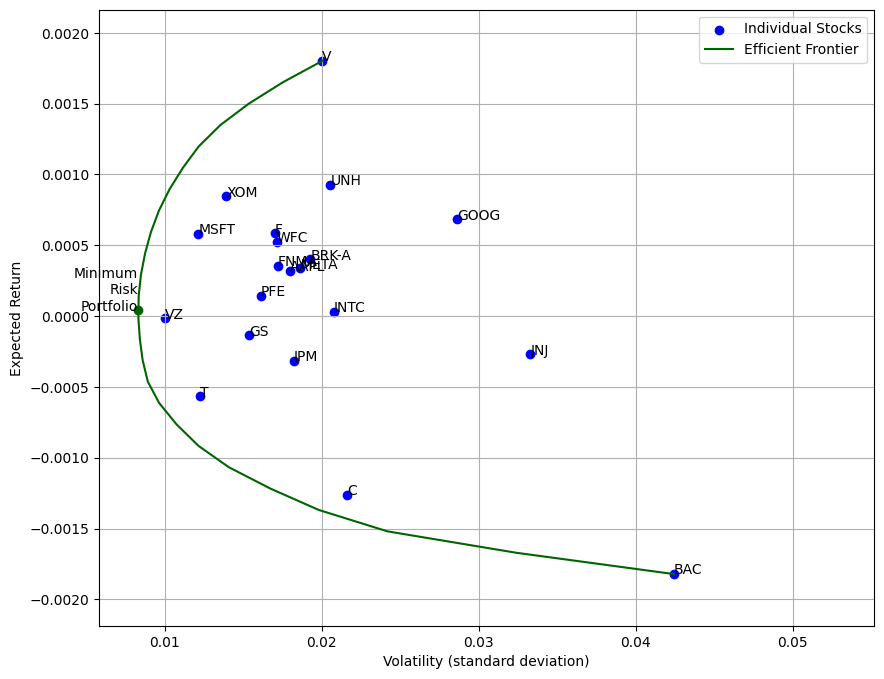

In [6]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=mu,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], mu[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, mu.min()*1.2, mu.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()